# Objectives

Visualize individual feature patterns
Run descriptive statistical analysis on the dataset
Use groups and pivot tables to find the effect of categorical variables on price
Use Pearson Correlation to measure the interdependence between variables

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [8]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=None)

In [9]:
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1
5,4.0,4,HP,4,2,1,7,15.600000000000001,0.6206896551724138,8,256,4.21155,837,Low,1,0


In [26]:
headers = ["Weight_Pounds","Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price","Price-binned","Screen-Full_HD","screen-IPS_panel"]
df.columns=headers


Visualize individual feature patterns

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U19'), dtype('float64')) -> None

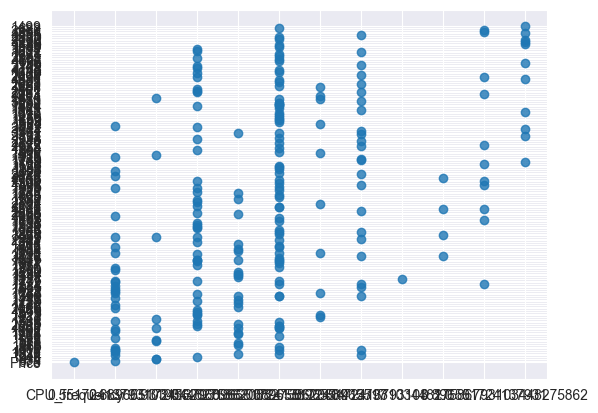

In [27]:
sns.regplot(x="CPU_frequency", y="Price",data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

TypeError: can't multiply sequence by non-int of type 'float'

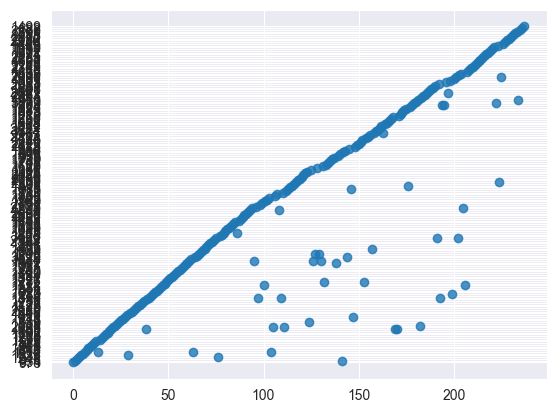

In [29]:
sns.regplot(x="Weight_Pounds", y="Price", data=df)
plt.ylim(0,)

Correlation values of the three attributes with Price

In [35]:
df['CPU_frequency'] = df['CPU_frequency'].astype(float)

ValueError: could not convert string to float: 'CPU_frequency'

In [36]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_Pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

ValueError: could not convert string to float: 'CPU_frequency'

<Axes: xlabel='Category', ylabel='Price'>

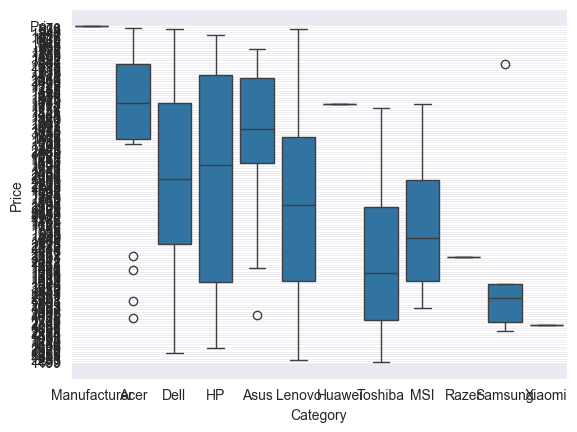

In [37]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

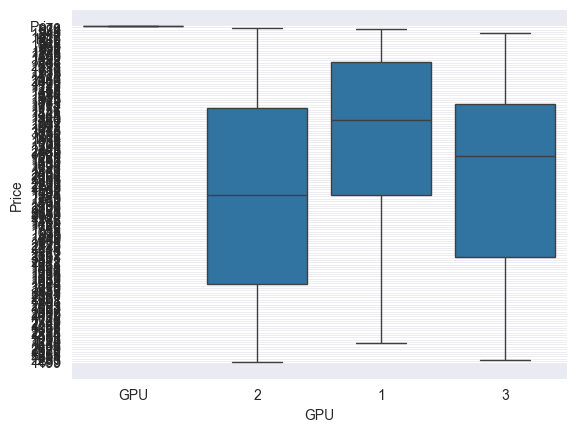

In [38]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

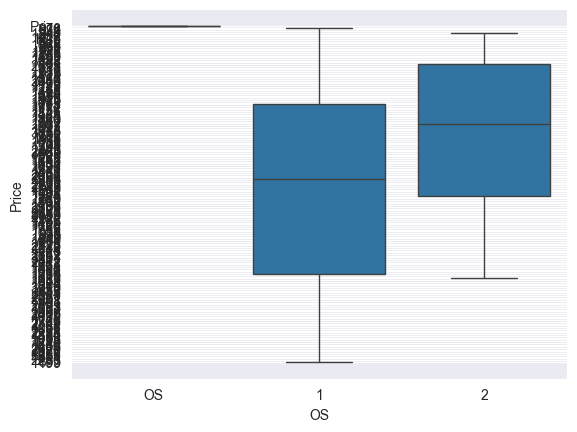

In [40]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

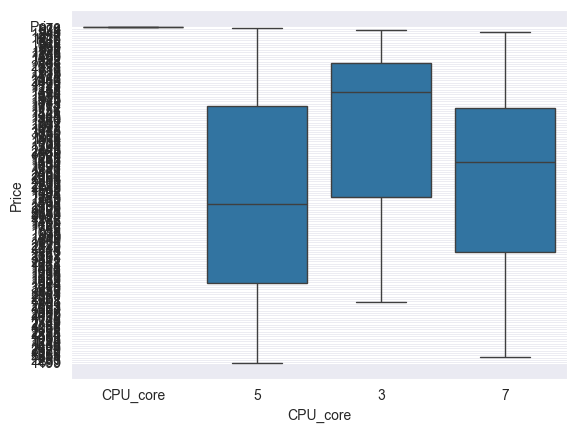

In [41]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

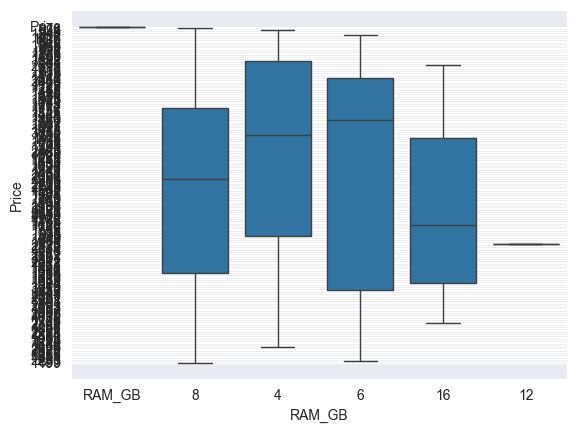

In [42]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

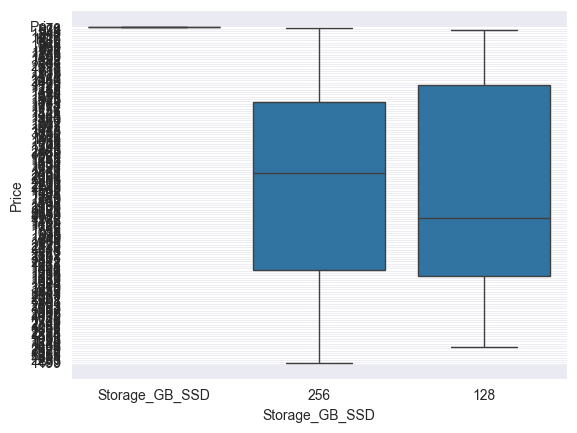

In [44]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

# Descriptive Statistical Analysis


In [46]:
print(df.describe())

       Weight_Pounds
count     238.000000
mean      118.500000
std        68.848868
min         0.000000
25%        59.250000
50%       118.500000
75%       177.750000
max       237.000000


In [47]:
print(df.describe(include=[object]))

       Manufacturer Category Screen  GPU   OS CPU_core    Screen_Size_inch  \
count           239      239    239  239  239      239                 239   
unique          239       12      6    4    3        4                  10   
top      Unnamed: 0     Dell      3    2    1        5  15.600000000000001   
freq              1       71    154  136  224      123                  93   

             CPU_frequency RAM_GB Storage_GB_SSD          Weight_kg Price  \
count                  239    239            239                239   239   
unique                  12      6              3                 79   194   
top     0.8620689655172414      8            256  4.851000000000001  1396   
freq                    71    184            219                 21     4   

       Price-binned Screen-Full_HD screen-IPS_panel  
count           239            239              239  
unique            4              3                3  
top             Low              1                0  
freq   

GroupBy and Pivot Tables

In [49]:
 df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

TypeError: agg function failed [how->mean,dtype->object]

Pearson Correlation and p-values

In [50]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_Pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

TypeError: unsupported operand type(s) for +: 'float' and 'str'